<a href="https://colab.research.google.com/github/ricardo-emanuel24/Ciencia-de-Dados/blob/main/atividade_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Previsão do crescimento de uma planta
Baseando em duas variáveis numéricas:
* Quantidade de luz recebida por dia (em horas)
* Volume de água fornecido por dia (em litros)

In [1]:
# Bibliotecas
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

In [2]:
# Definir os parâmetros do modelo
np.random.seed(42)  # Para resultados reprodutíveis
n_samples = 200  # Número de amostras

# Variáveis preditoras (X1 e X2)
luz_horas = np.random.uniform(4, 12, n_samples)  # Luz recebida por dia (em horas)
agua_litros = np.random.uniform(0.5, 3, n_samples)  # Volume de água por dia (em litros)

# Gerar a variável resposta (crescimento em cm)
# Fórmula linear base + ruído
crescimento = 3 + 0.8 * luz_horas + 2.5 * agua_litros + np.random.normal(0, 1, n_samples)

# Criar DataFrame
data = pd.DataFrame({
    'Luz_horas': luz_horas,
    'Agua_litros': agua_litros,
    'Crescimento_cm': crescimento
})

# Visualizar as primeiras linhas do conjunto de dados


# Salvar os dados em um arquivo CSV (opcional)
data.to_csv('crescimento_plantas.csv', index=False)

O código acima gera um conjunto de dados sintéticos, com base em uma relação linear com ruído adicionado para simular variabilidade, no qual a variável resposta contínua (target) é crescimento da planta em centímentros

Os resultados são exibidos abaixo:

In [6]:
data.head(200)

,Luz_horas,Agua_litros,Crescimento_cm
0,6.996321,2.105079,15.165233
1,11.605714,0.710350,14.081450
2,9.855952,0.904072,13.826894
3,8.789268,2.746385,16.587111
4,5.248149,2.016073,12.562867
...,...,...,...
195,6.793677,2.826893,14.671224
196,9.807645,2.646032,17.731653
197,11.176882,1.572485,15.822480
198,11.096691,2.377178,17.581349


Os dados serão dividos em 70% para treino e 30% para teste, no qual o conjunto de teste será utilizado exclusivamento para a avaliação final.

* **Treino**: Para ajustar o modelo.
* **Teste**: Para avaliar a performance do modelo em dados desconhecidos.

In [7]:
# Dividir as variáveis preditoras (X) e a variável resposta (y)
X = data[['Luz_horas', 'Agua_litros']]  # Variáveis preditoras
y = data['Crescimento_cm']             # Variável resposta

# Divisão dos dados (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar o tamanho dos conjuntos
print(f"Conjunto de treino: {X_train.shape[0]} amostras")
print(f"Conjunto de teste: {X_test.shape[0]} amostras")

Conjunto de treino: 140 amostras
Conjunto de teste: 60 amostras


### Treinamento do modelo de regressão linear
A equação que o modelo ajusta tem a forma:

`Crescimento_cm=(Coeficiente_1×Luz_horas)+(Coeficiente_2×Agua_litros)+Intercepto`

Após o treinamento, você pode usar esse modelo para fazer previsões no conjunto de teste.

In [8]:
# Instanciar o modelo de regressão linear
modelo = LinearRegression()

# Treinar o modelo com o conjunto de treino
modelo.fit(X_train, y_train)

# Exibir os coeficientes do modelo
print("Coeficientes:", modelo.coef_)
print("Intercepto:", modelo.intercept_)


Coeficientes: [0.77167491 2.40653859]
Intercepto: 3.4323197332013287


## Avaliação do Modelo e Análise de Resíduos

Após o treinamento, é realizada uma avaliação do modelo no conjunto de teste, calculando métricas de desempenho e analisando os resíduos:

Erro absoluto médio (MAE): 0.99
Erro quadrático médio (MSE): 1.45
Raiz do erro quadrático médio (RMSE): 1.20
Coeficiente de determinação (R²): 0.83


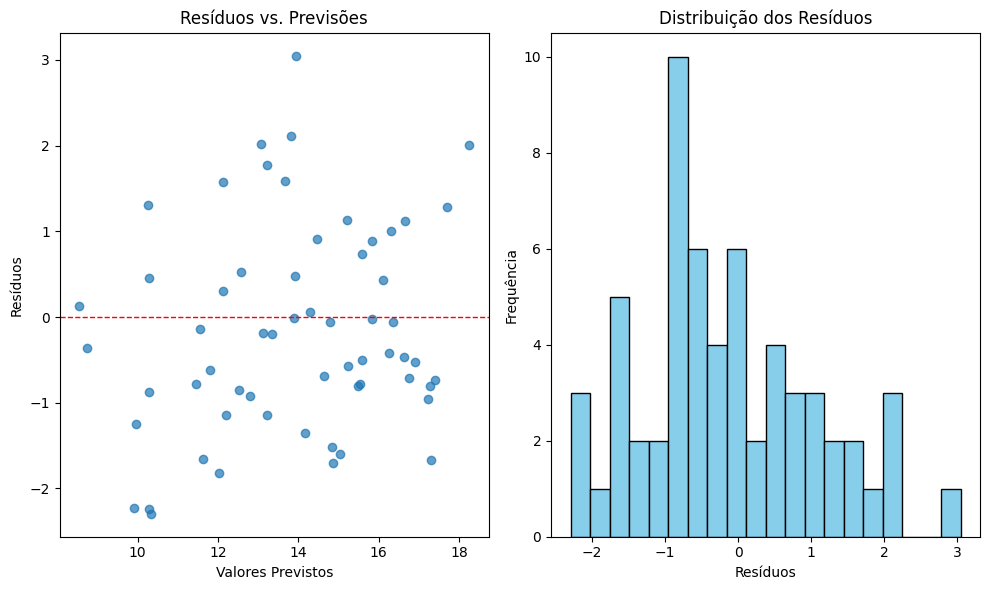

In [9]:
# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)

# Calcular métricas
mae = mean_absolute_error(y_test, y_pred)  # Erro absoluto médio
mse = mean_squared_error(y_test, y_pred)  # Erro quadrático médio
rmse = mse ** 0.5  # Raiz do erro quadrático médio
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinação

# Exibir as métricas
print(f"Erro absoluto médio (MAE): {mae:.2f}")
print(f"Erro quadrático médio (MSE): {mse:.2f}")
print(f"Raiz do erro quadrático médio (RMSE): {rmse:.2f}")
print(f"Coeficiente de determinação (R²): {r2:.2f}")

# Análise de resíduos
residuos = y_test - y_pred

# Plotar resíduos
plt.figure(figsize=(10, 6))

# Resíduos vs. Previsões
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(0, color='red', linestyle='--', linewidth=1)
plt.title("Resíduos vs. Previsões")
plt.xlabel("Valores Previstos")
plt.ylabel("Resíduos")

# Histograma dos resíduos
plt.subplot(1, 2, 2)
plt.hist(residuos, bins=20, color='skyblue', edgecolor='black')
plt.title("Distribuição dos Resíduos")
plt.xlabel("Resíduos")
plt.ylabel("Frequência")

plt.tight_layout()
plt.show()


1. Métricas calculadas:
* MAE: Mede o erro médio absoluto entre valores reais e previstos.
* MSE: Penaliza erros maiores, calculando o quadrado das diferenças.
* RMSE: É a raiz quadrada do MSE, mais intuitiva por estar na mesma escala da variável resposta.
* R²: Mede a proporção da variância explicada pelo modelo (próximo de 1 é melhor).
2. Análise de resíduos:

* Resíduos vs. Previsões: Mostra resíduos distribuídos aleatoriamente ao redor de zero (sem padrão claro).
* Histograma dos resíduos: Deve se aproximar de uma distribuição normal.

 ## Validação cruzada

A técnica de validação cruzada permite avaliar o desempenho do modelo de forma mais robusta, reduzindo a dependência de uma única divisão de treino e teste, pois é avaliado várias vezes com diferentes partes do conjunto de treinamento.

**Interpretação:**
* Se o RMSE da validação cruzada for próximo ao RMSE do conjunto de teste, o modelo generaliza bem.
* Diferenças significativas podem indicar overfitting ou underfitting.

In [10]:
# Aplicar validação cruzada com 5 folds no conjunto de treino
cv_scores = cross_val_score(modelo, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Calcular métricas da validação cruzada
cv_rmse = np.sqrt(-cv_scores)  # Convertendo para RMSE
cv_rmse_mean = np.mean(cv_rmse)  # Média do RMSE nos folds

# Exibir os resultados da validação cruzada
print(f"RMSE nos folds de validação cruzada: {cv_rmse}")
print(f"Média do RMSE na validação cruzada: {cv_rmse_mean:.2f}")

# Comparar com o conjunto de teste
print(f"RMSE no conjunto de teste: {rmse:.2f}")

RMSE nos folds de validação cruzada: [0.7325894  1.03952026 0.8762623  0.81748478 1.0429359 ]
Média do RMSE na validação cruzada: 0.90
RMSE no conjunto de teste: 1.20
